In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
protein_concentrations = [8,40,200,1000]
path = '/datadisk/MIME/exp/expData/parsed_data/round2/'

In [3]:
# initialize bound and unbount count dictionaries
bound_counts = {}
unbound_counts = {}
sequences = {}

In [4]:
# read in all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        bound_counts[(c1,c2)] = np.loadtxt(path + f'encoded_pool_{c1}_{c2}/encoded_pool/bound_counts.txt')
        unbound_counts[(c1,c2)] = np.loadtxt(path + f'encoded_pool_{c1}_{c2}/encoded_pool/unbound_counts.txt')
        sequences[(c1,c2)] = np.loadtxt(path + f'encoded_pool_{c1}_{c2}/encoded_pool/unique_sequences.txt', dtype=str)
   

In [5]:
# filter all counts to only include values that are not zero
# bound_counts = {k: v[v > 0] for k, v in bound_counts.items()}
# unbound_counts = {k: v[v > 0] for k, v in unbound_counts.items()}

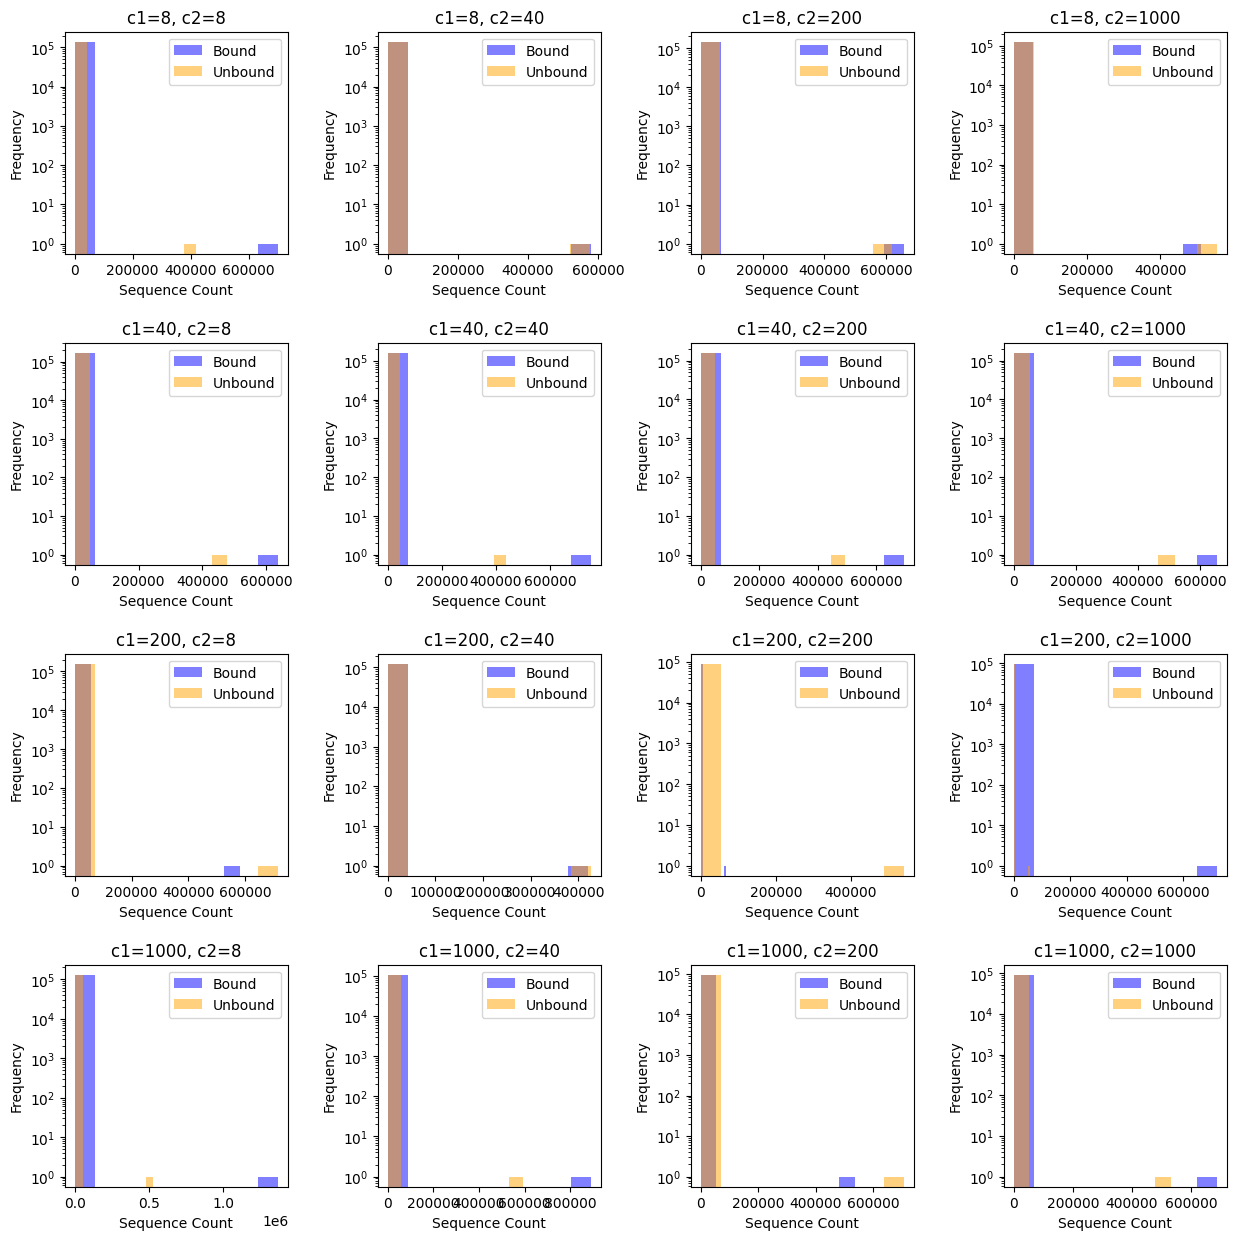

In [6]:
# setup 4 by 4 grid
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# loop through all concentrations
for i, c1 in enumerate(protein_concentrations):
    for j, c2 in enumerate(protein_concentrations):
        # plot histogram of bound and unbound counts
        axs[i, j].hist(bound_counts[(c1,c2)], alpha=0.5, label='Bound', color='blue')
        axs[i, j].hist(unbound_counts[(c1,c2)], alpha=0.5, label='Unbound', color='orange')
        axs[i, j].set_title(f'c1={c1}, c2={c2}')
        axs[i, j].set_xlabel('Sequence Count')
        axs[i, j].set_ylabel('Frequency')
        # log scale the y-axis
        axs[i, j].set_yscale('log')
        axs[i, j].legend()
        
plt.show()

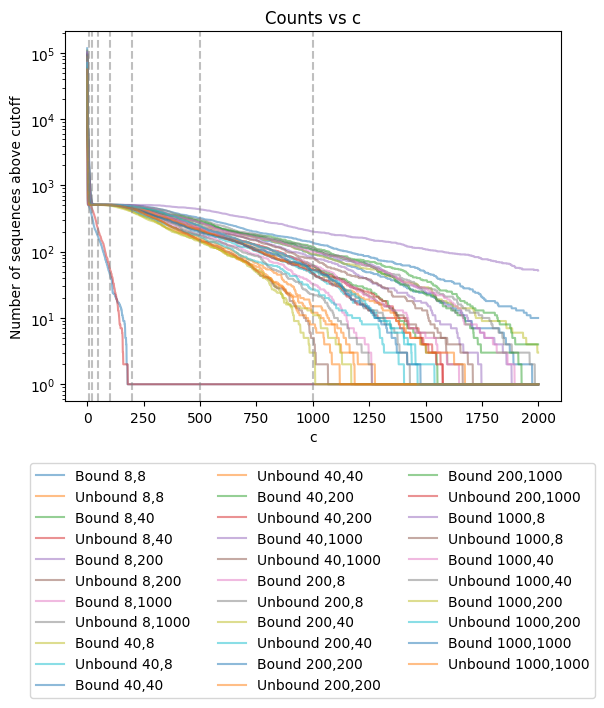

In [7]:
# for each pool plot number of counts > threshold vs theshold
thresholds = np.arange(0, 2000, 1)
bound_counts_above_threshold = {}
unbound_counts_above_threshold = {}
combined_counts_above_threshold = {}
# loop through all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        # get the bound and unbound counts
        bound_counts_above_threshold[(c1,c2)] = np.array([np.sum(bound_counts[(c1,c2)] > t) for t in thresholds])
        unbound_counts_above_threshold[(c1,c2)] = np.array([np.sum(unbound_counts[(c1,c2)] > t) for t in thresholds])
        # combined counts are the minimum of the two
        combined_counts_above_threshold[(c1,c2)] = np.array([np.sum(np.minimum(bound_counts[(c1,c2)], unbound_counts[(c1,c2)]) > t) for t in thresholds])
        # plot the number of counts above threshold
        plt.plot(thresholds, bound_counts_above_threshold[(c1,c2)], label=f'Bound {c1},{c2}', alpha=0.5)
        plt.plot(thresholds, unbound_counts_above_threshold[(c1,c2)], label=f'Unbound {c1},{c2}', alpha=0.5)

# vertical lines at 10, 20, 50, 100, 200, 500, 1000
for t in [10, 20, 50, 100, 200, 500, 1000]:
    plt.axvline(x=t, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('c')
plt.ylabel('Number of sequences above cutoff')
plt.yscale('log')
plt.title('Counts vs c')
# plot legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

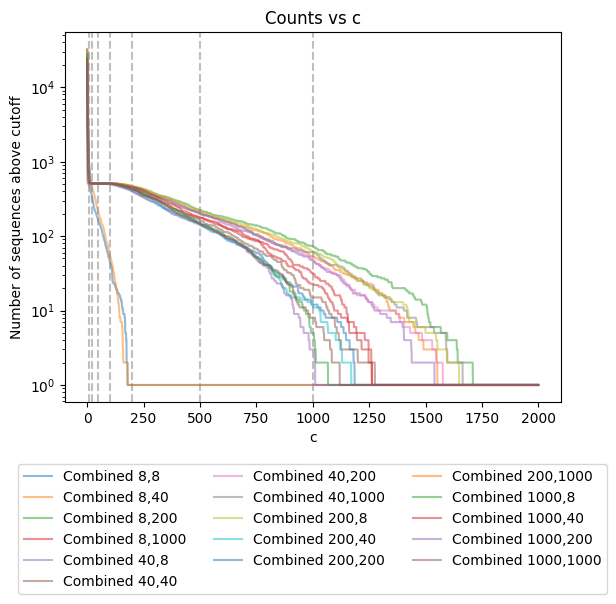

In [8]:
# for each pool plot number of counts > threshold vs theshold for combined bound and unbound
counts_combined_above_threshold = {}
# loop through all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        # plot the number of counts above threshold
        plt.plot(thresholds, combined_counts_above_threshold[(c1,c2)], label=f'Combined {c1},{c2}', alpha=0.5)
# vertical lines at 10, 20, 50, 100, 200, 500, 1000
for t in [10, 20, 50, 100, 200, 500, 1000]:
    plt.axvline(x=t, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('c')
plt.ylabel('Number of sequences above cutoff')
plt.yscale('log')
plt.title('Counts vs c')
# plot legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

In [9]:
# 200,200 and 200,1000 have weird counts!

In [10]:
# get number of unique sequences with 2 or more mutations (non zero states)
high_mutant_seqs_bound = {}
high_mutant_seqs_unbound = {}
high_mutant_seqs_combined = {}
# sequences are strings of states that are either '0' for wildtype or '1', '2', '3' for mutant states
# loop through all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        # get the sequences
        seqs = list(sequences[(c1,c2)])
        # get the bound and unbound counts
        bound_counts_ = bound_counts[(c1,c2)]
        unbound_counts_ = unbound_counts[(c1,c2)]
        # get the indices of the sequences with 2 or more mutations
        bound_indices = []
        unbound_indices = []
        for seq in seqs:
            # count the number of mutations in the sequence
            seq = list(seq)
            num_mutations = np.sum(np.array(seq) != '0')
            # if there are 2 or more mutations, add the index to the list
            if num_mutations >= 2:
                bound_indices.append(True)
                unbound_indices.append(True)
            else:
                bound_indices.append(False)
                unbound_indices.append(False)

        # add the counts of these sequences to the bound and unbound counts
        high_mutant_seqs_bound[(c1,c2)] = bound_counts_[bound_indices]
        high_mutant_seqs_unbound[(c1,c2)] = unbound_counts_[unbound_indices]
        high_mutant_seqs_combined[(c1,c2)] = np.min([high_mutant_seqs_bound[(c1,c2)], high_mutant_seqs_unbound[(c1,c2)]], axis=0)

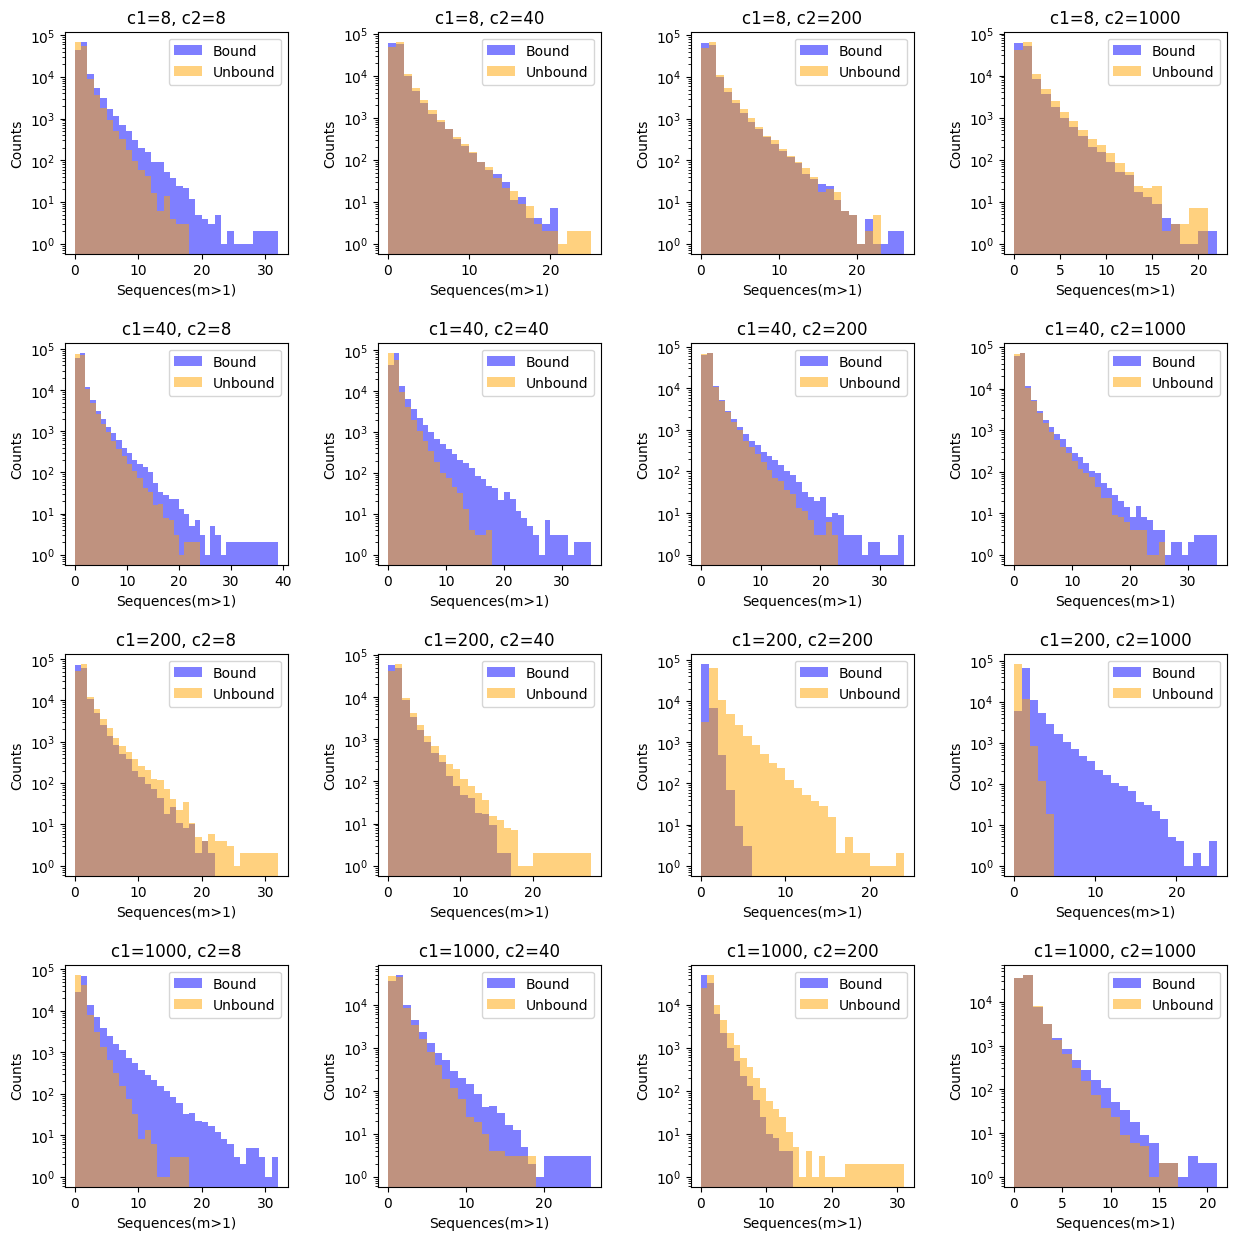

In [11]:
# plot histogram of number of unique sequences with 2 or more mutations
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# loop through all concentrations
for i, c1 in enumerate(protein_concentrations):
    for j, c2 in enumerate(protein_concentrations):
        # plot histogram of bound and unbound counts
        axs[i, j].hist(high_mutant_seqs_bound[(c1,c2)], alpha=0.5, label='Bound', color='blue', bins=np.unique(high_mutant_seqs_bound[(c1,c2)]))
        axs[i, j].hist(high_mutant_seqs_unbound[(c1,c2)], alpha=0.5, label='Unbound', color='orange', bins=np.unique(high_mutant_seqs_unbound[(c1,c2)]))
        axs[i, j].set_title(f'c1={c1}, c2={c2}')
        axs[i, j].set_xlabel('Sequences(m>1)')
        axs[i, j].set_ylabel('Counts')
        # log scale the y-axis
        axs[i, j].set_yscale('log')
        axs[i, j].legend()
plt.show()

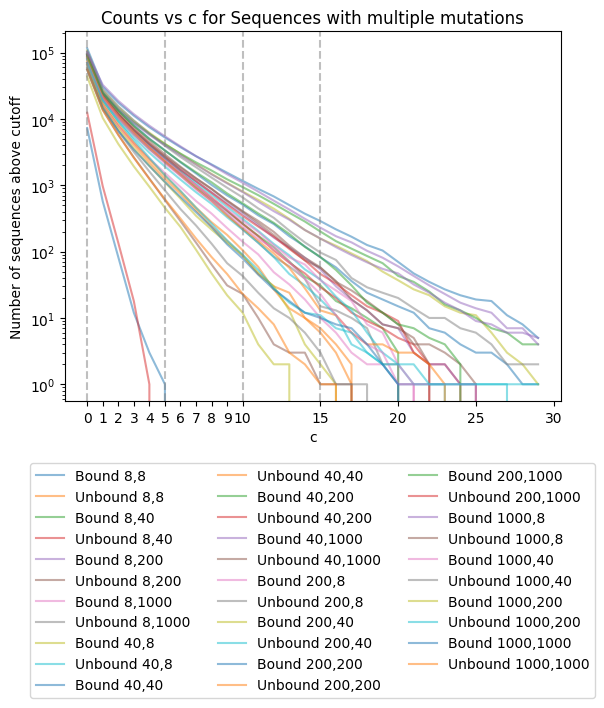

In [12]:
# plot threshold vs number of unique sequences with 2 or more mutations
thresholds = np.arange(0, 30, 1)
high_mutant_seqs_bound_above_threshold = {}
high_mutant_seqs_unbound_above_threshold = {}
# loop through all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        # get the bound and unbound counts
        bound_counts_ = high_mutant_seqs_bound[(c1,c2)]
        unbound_counts_ = high_mutant_seqs_unbound[(c1,c2)]
        # get the number of sequences above the threshold
        high_mutant_seqs_bound_above_threshold[(c1,c2)] = np.array([np.sum(bound_counts_ > t) for t in thresholds])
        high_mutant_seqs_unbound_above_threshold[(c1,c2)] = np.array([np.sum(unbound_counts_ > t) for t in thresholds])
        # plot the number of counts above threshold
        plt.plot(thresholds, high_mutant_seqs_bound_above_threshold[(c1,c2)], label=f'Bound {c1},{c2}', alpha=0.5)
        plt.plot(thresholds, high_mutant_seqs_unbound_above_threshold[(c1,c2)], label=f'Unbound {c1},{c2}', alpha=0.5)
# vertical lines at 10, 20, 50, 100, 200, 500, 1000
for t in [0, 5, 10, 15]:
    plt.axvline(x=t, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('c')
plt.ylabel('Number of sequences above cutoff')
plt.title('Counts vs c for Sequences with multiple mutations')
plt.yscale('log')
# set x ticks to be arange(0, 20, 1)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,15,20,25,30])
# plot legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

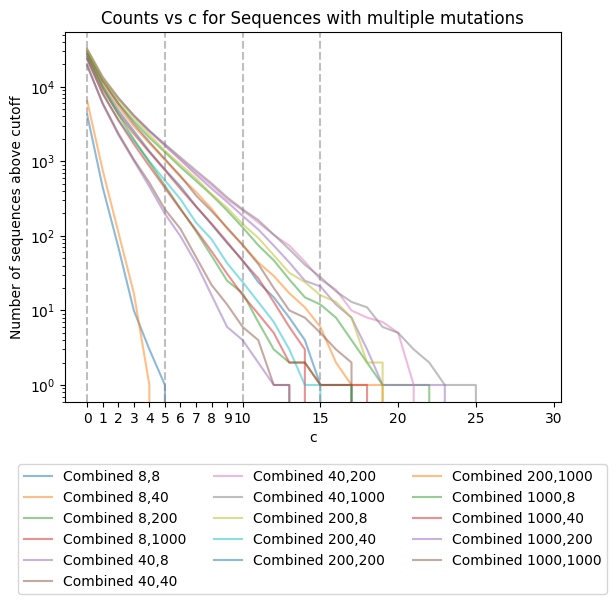

In [13]:
# plot the number of unique sequences with 2 or more mutations vs threshold for combined counts
thresholds = np.arange(0, 30, 1)
high_mutant_seqs_combined_above_threshold = {}
# loop through all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        # get the bound and unbound counts
        combined_counts_ = high_mutant_seqs_combined[(c1,c2)]
        # get the number of sequences above the threshold
        high_mutant_seqs_combined_above_threshold[(c1,c2)] = np.array([np.sum(combined_counts_ > t) for t in thresholds])
        # plot the number of counts above threshold
        plt.plot(thresholds, high_mutant_seqs_combined_above_threshold[(c1,c2)], label=f'Combined {c1},{c2}', alpha=0.5)
# vertical lines at 10, 20, 50, 100, 200, 500, 1000
for t in [0, 5, 10, 15]:
    plt.axvline(x=t, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('c')
plt.ylabel('Number of sequences above cutoff')
plt.title('Counts vs c for Sequences with multiple mutations')
plt.yscale('log')
# set x ticks to be arange(0, 20, 1)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,15,20,25,30])
# plot legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

In [14]:
# plot the number of unique sequences with 2 or more mutations vs threshold in bound and unbound combined
thresholds = np.arange(0, 30, 1)
high_mutant_seqs_bound_above_threshold_combined = {}
high_mutant_seqs_unbound_above_threshold_combined = {}
# loop through all concentrations

In [15]:
path = '/datadisk/MIME/exp/expData/'

In [16]:
# load encoded wt sequences
encoded_wt = np.loadtxt(path + 'aligned_reads_Wt_encoded.txt', dtype=str)
print(encoded_wt.shape)

(1464898,)


In [17]:
# split characters into columns
encoded_wt = np.array([list(seq) for seq in encoded_wt])
print(encoded_wt.shape)

(1464898, 169)


In [18]:
# count how often '0', '1', '2', '3' appear in each column
counts = np.zeros((encoded_wt.shape[1], 4), dtype=int)
for i in range(encoded_wt.shape[1]):
    counts[i, 0] = np.sum(encoded_wt[:, i] == '0')
    counts[i, 1] = np.sum(encoded_wt[:, i] == '1')
    counts[i, 2] = np.sum(encoded_wt[:, i] == '2')
    counts[i, 3] = np.sum(encoded_wt[:, i] == '3')
print(counts)

[[1464811      33      30      24]
 [1464796      42      28      32]
 [1464827      29      21      21]
 [1464795      40      32      31]
 [1464852      15      12      19]
 [1464777      31      50      40]
 [1464828      27      23      20]
 [1464809      23      24      42]
 [1464831      22      22      23]
 [1464825      30      14      29]
 [1464837      20      24      17]
 [1464862      14       8      14]
 [1464825      29      17      27]
 [1464845      18      15      20]
 [1464844      24      18      12]
 [1464835      19      23      21]
 [1464832      30      14      22]
 [1464784      38      36      40]
 [1464834      22      18      24]
 [1464756      49      54      39]
 [1464794      33      30      41]
 [1464779      43      41      35]
 [1464777      44      42      35]
 [1464818      23      32      25]
 [1464811      29      28      30]
 [1464841      15      20      22]
 [1464830      26      14      28]
 [1464799      43      33      23]
 [1464819      30   

In [19]:
# convert counts to percentages
counts = counts / np.sum(counts, axis=1, keepdims=True)
print(counts)

[[9.99940610e-01 2.25271657e-05 2.04792416e-05 1.63833932e-05]
 [9.99930371e-01 2.86709382e-05 1.91139588e-05 2.18445243e-05]
 [9.99951532e-01 1.97966002e-05 1.43354691e-05 1.43354691e-05]
 [9.99929688e-01 2.73056554e-05 2.18445243e-05 2.11618829e-05]
 [9.99968598e-01 1.02396208e-05 8.19169662e-06 1.29701863e-05]
 [9.99917400e-01 2.11618829e-05 3.41320693e-05 2.73056554e-05]
 [9.99952215e-01 1.84313174e-05 1.57007519e-05 1.36528277e-05]
 [9.99939245e-01 1.57007519e-05 1.63833932e-05 2.86709382e-05]
 [9.99954263e-01 1.50181105e-05 1.50181105e-05 1.57007519e-05]
 [9.99950167e-01 2.04792416e-05 9.55697939e-06 1.97966002e-05]
 [9.99958359e-01 1.36528277e-05 1.63833932e-05 1.16049035e-05]
 [9.99975425e-01 9.55697939e-06 5.46113108e-06 9.55697939e-06]
 [9.99950167e-01 1.97966002e-05 1.16049035e-05 1.84313174e-05]
 [9.99963820e-01 1.22875449e-05 1.02396208e-05 1.36528277e-05]
 [9.99963137e-01 1.63833932e-05 1.22875449e-05 8.19169662e-06]
 [9.99956994e-01 1.29701863e-05 1.57007519e-05 1.433546

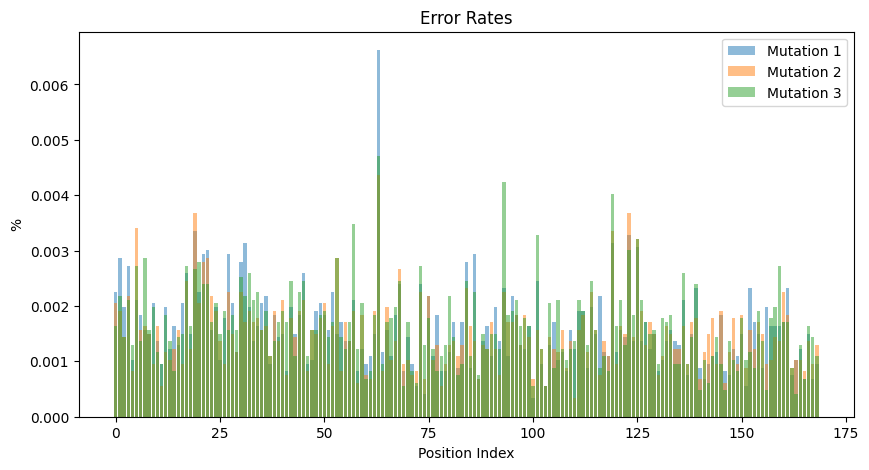

In [20]:
# plot the counts
plt.figure(figsize=(10, 5))
# plt.bar(np.arange(encoded_wt.shape[1]), counts[:, 0], label='0', alpha=0.5)
plt.bar(np.arange(encoded_wt.shape[1]), counts[:, 1]*100, label='Mutation 1', alpha=0.5)
plt.bar(np.arange(encoded_wt.shape[1]), counts[:, 2]*100, label='Mutation 2', alpha=0.5)
plt.bar(np.arange(encoded_wt.shape[1]), counts[:, 3]*100, label='Mutation 3', alpha=0.5)
plt.xlabel('Position Index')
plt.ylabel('%')
plt.title('Error Rates')
plt.legend()
plt.show()

In [21]:
# write out the counts to a file
np.savetxt(path + 'encoded_wt_counts.txt', counts, fmt='%f')

In [22]:
mean_error_probs = np.mean(counts[:, 1:], axis=1)
print(mean_error_probs.shape)
print(mean_error_probs)

(169,)
[1.97966002e-05 2.32098071e-05 1.61558461e-05 2.34373542e-05
 1.04671679e-05 2.75332025e-05 1.59282990e-05 2.02516944e-05
 1.52456576e-05 1.66109404e-05 1.38803748e-05 8.19169662e-06
 1.66109404e-05 1.20599978e-05 1.22875449e-05 1.43354691e-05
 1.50181105e-05 2.59403726e-05 1.45630162e-05 3.23116922e-05
 2.36649014e-05 2.70781083e-05 2.75332025e-05 1.82037703e-05
 1.97966002e-05 1.29701863e-05 1.54732047e-05 2.25271657e-05
 1.79762231e-05 1.29701863e-05 2.52577313e-05 2.34373542e-05
 2.16169772e-05 1.72935818e-05 1.88864117e-05 1.72935818e-05
 1.91139588e-05 1.04671679e-05 1.70660346e-05 1.50181105e-05
 1.84313174e-05 1.09222622e-05 2.07067887e-05 1.34252806e-05
 2.00241473e-05 2.38924485e-05 9.55697939e-06 1.38803748e-05
 1.66109404e-05 1.88864117e-05 1.93415059e-05 1.31977334e-05
 1.86588645e-05 2.41199956e-05 1.31977334e-05 1.43354691e-05
 1.47905633e-05 2.50301841e-05 8.87433801e-06 1.70660346e-05
 7.96414949e-06 8.64679088e-06 1.75211289e-05 5.23358395e-05
 9.78452652e-06 1

In [23]:
# write out the mean error probabilities to a file
np.savetxt(path + 'encoded_wt_mean_error_probs.txt', mean_error_probs, fmt='%f')

In [24]:
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.min([a,b], axis=0))

[1 2 3]


In [25]:
c = 10
lambda_l1 = 0.1
correction_method = 'none'
protein_concentrations = [8,40,200,1000]

In [26]:
savepath = f'/datadisk/MIME/exp/expData/Inference_c_{c}_lambda_{lambda_l1}_{correction_method}/'

logK_sequences_r2 = []

for protein_concentration1 in protein_concentrations:
    for protein_concentration2 in protein_concentrations:
        # load the logK_sequences_r2
        logK_sequences_r2.append(np.load(f'{savepath}logK_sequences_r2_{protein_concentration1}_{protein_concentration2}.npz')['logK_sequences_r2'])

In [27]:
print(len(logK_sequences_r2))
for i in range(len(logK_sequences_r2)):
    print(logK_sequences_r2[i].shape)

16
(138254,)
(138907,)
(144876,)
(126899,)
(169530,)
(161235,)
(159555,)
(159679,)
(157604,)
(123950,)
(89399,)
(97536,)
(131117,)
(106574,)
(95364,)
(91716,)


In [28]:
# load unique sequences
loadpath = '/datadisk/MIME/exp/expData/parsed_data/round2/'
unique_sequences = []
for protein_concentration_1 in protein_concentrations:
    for protein_concentration_2 in protein_concentrations:
        unique_sequences.append(np.genfromtxt(loadpath + f"encoded_pool_{protein_concentration_1}_{protein_concentration_2}/encoded_pool/unique_sequences.txt", delimiter=1))
print(len(unique_sequences))
for i in range(len(unique_sequences)):
    print(unique_sequences[i].shape)
print(unique_sequences[0][0])

16
(138254, 169)
(138907, 169)
(144876, 169)
(126899, 169)
(169530, 169)
(161235, 169)
(159555, 169)
(159679, 169)
(157604, 169)
(123950, 169)
(89399, 169)
(97536, 169)
(131117, 169)
(106574, 169)
(95364, 169)
(91716, 169)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [29]:
# for each pool get the indices of the sequences that contain only 1 mutation
single_mutant_indices = []
for pool in range(len(logK_sequences_r2)):
    # get the sequences
    seqs = unique_sequences[pool]
    # get the logK sequences
    logK_seqs = logK_sequences_r2[pool]
    # get the indices of the sequences with 1 mutation
    indices = []
    for seq in seqs:
        # count the number of mutations in the sequence
        seq = list(seq)
        num_mutations = np.sum(np.array(seq) != 0)
        # if there is 1 mutation, add the index to the list
        if num_mutations == 1:
            indices.append(True)
        else:
            indices.append(False)
    single_mutant_indices.append(indices)


In [30]:
print(len(single_mutant_indices))
for i in range(len(single_mutant_indices)):
    print(len(single_mutant_indices[i]))

16
138254
138907
144876
126899
169530
161235
159555
159679
157604
123950
89399
97536
131117
106574
95364
91716


In [31]:
# get logK values from these indices
logK_single_mutant = []
for pool in range(len(logK_sequences_r2)):
    # get the logK sequences
    logK_seqs = logK_sequences_r2[pool]
    # get the indices of the sequences with 1 mutation
    indices = single_mutant_indices[pool]
    # get the logK values for these indices
    logK_single_mutant.append(logK_seqs[indices])

In [32]:
print(len(logK_single_mutant))
for i in range(len(logK_single_mutant)):
    print(logK_single_mutant[i].shape)

print(logK_single_mutant[0])

16
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
(507,)
[ 0.0969098  -0.02223285 -0.05593738 -0.10815025 -0.15868396 -0.16623116
 -0.04833161  0.04361371 -0.12777583  0.0029574   0.15227616  0.01900006
 -0.02864231 -0.16144195 -0.06338356 -0.26727419 -0.0441619  -0.09404725
 -0.20235902 -0.05045674 -0.00413763 -0.0239857  -0.02640981 -0.01121505
 -0.03194897 -0.13811799 -0.13971101 -0.06162988 -0.00477363 -0.01624403
  0.01070097 -0.10595026 -0.04449283  0.01436267 -0.03803652  0.01550748
 -0.1166643  -0.02833043 -0.12527109 -0.03898366 -0.04345473  0.00395488
  0.09790121 -0.01875459  0.12203978  0.09652722  0.13092181  0.2050667
  0.09712573  0.0202083   0.00713635 -0.02575771  0.05170644 -0.0613142
  0.02576187  0.03324149  0.04978574  0.14089901  0.18029141 -0.18050725
  0.00086616  0.06242614  0.12034838  0.1738189   0.03591302  0.19134125
  0.17081267 -0.04922836  0.17816149  0.01992427  0.07770076  0.16333587
  0.0226748

In [33]:
# get correlation matrix of logK_single_mutant
logK_single_mutant_corr = np.zeros((len(logK_single_mutant), len(logK_single_mutant)))
for i in range(len(logK_single_mutant)):
    for j in range(len(logK_single_mutant)):
        logK_single_mutant_corr[i,j] = np.corrcoef(logK_single_mutant[i], logK_single_mutant[j])[0,1]
print(np.round(logK_single_mutant_corr,3))

[[ 1.     0.317  0.384  0.298  0.222  0.418  0.369  0.241  0.105  0.076
     nan    nan  0.247  0.31   0.36   0.359]
 [ 0.317  1.     0.701  0.701  0.338  0.596  0.718  0.522  0.374  0.158
     nan    nan  0.402  0.668  0.701  0.713]
 [ 0.384  0.701  1.     0.818  0.263  0.688  0.868  0.745  0.328  0.177
     nan    nan  0.358  0.665  0.852  0.821]
 [ 0.298  0.701  0.818  1.     0.215  0.618  0.824  0.706  0.353  0.161
     nan    nan  0.343  0.64   0.818  0.788]
 [ 0.222  0.338  0.263  0.215  1.     0.302  0.292  0.019  0.222 -0.134
     nan    nan  0.449  0.386  0.25   0.332]
 [ 0.418  0.596  0.688  0.618  0.302  1.     0.695  0.565  0.43   0.089
     nan    nan  0.338  0.602  0.695  0.662]
 [ 0.369  0.718  0.868  0.824  0.292  0.695  1.     0.753  0.381  0.156
     nan    nan  0.387  0.69   0.879  0.849]
 [ 0.241  0.522  0.745  0.706  0.019  0.565  0.753  1.     0.229  0.308
     nan    nan  0.148  0.478  0.748  0.67 ]
 [ 0.105  0.374  0.328  0.353  0.222  0.43   0.381  0.229  1.   

In [34]:
# replace nan in logK_single_mutant_corr with 0
logK_single_mutant_corr[np.isnan(logK_single_mutant_corr)] = 0

In [40]:
B = [8, 40, 200, 1000]
legend_labels = []
for i in range(len(B)):
    for j in range(len(B)):
            legend_labels.append('$B_{tot} = \{'+ str(B[i])+', '+ str(B[j])+'\}$')

print(legend_labels)

['$B_{tot} = \\{8, 8\\}$', '$B_{tot} = \\{8, 40\\}$', '$B_{tot} = \\{8, 200\\}$', '$B_{tot} = \\{8, 1000\\}$', '$B_{tot} = \\{40, 8\\}$', '$B_{tot} = \\{40, 40\\}$', '$B_{tot} = \\{40, 200\\}$', '$B_{tot} = \\{40, 1000\\}$', '$B_{tot} = \\{200, 8\\}$', '$B_{tot} = \\{200, 40\\}$', '$B_{tot} = \\{200, 200\\}$', '$B_{tot} = \\{200, 1000\\}$', '$B_{tot} = \\{1000, 8\\}$', '$B_{tot} = \\{1000, 40\\}$', '$B_{tot} = \\{1000, 200\\}$', '$B_{tot} = \\{1000, 1000\\}$']


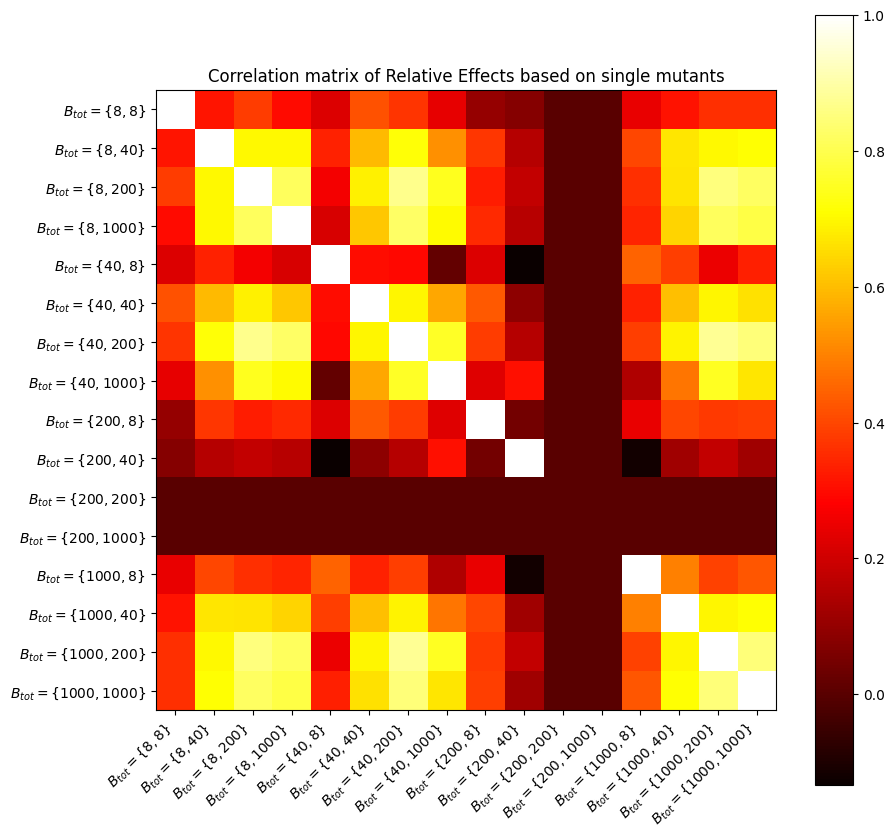

In [44]:
# plot correlation matrix
plt.figure(figsize=(10, 10))
plt.imshow(logK_single_mutant_corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Correlation matrix of Relative Effects based on single mutants')
plt.xticks(np.arange(len(legend_labels)), legend_labels, rotation=45, ha='right')
plt.yticks(np.arange(len(legend_labels)), legend_labels)
plt.show()

In [36]:
usefull_pools = [1, 2, 3, 5, 6, 7, 13, 14, 15]

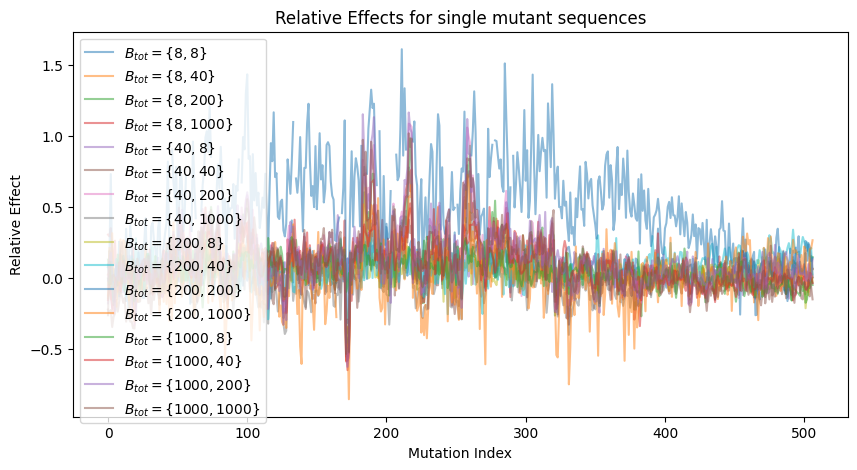

In [41]:
# plot the logK values per pool
plt.figure(figsize=(10, 5))
for i in range(len(logK_single_mutant)):
    plt.plot(logK_single_mutant[i], label=legend_labels[i], alpha=0.5)
plt.xlabel('Mutation Index')
plt.ylabel('Relative Effect')
plt.title('Relative Effects for single mutant sequences')
plt.legend()
plt.show()

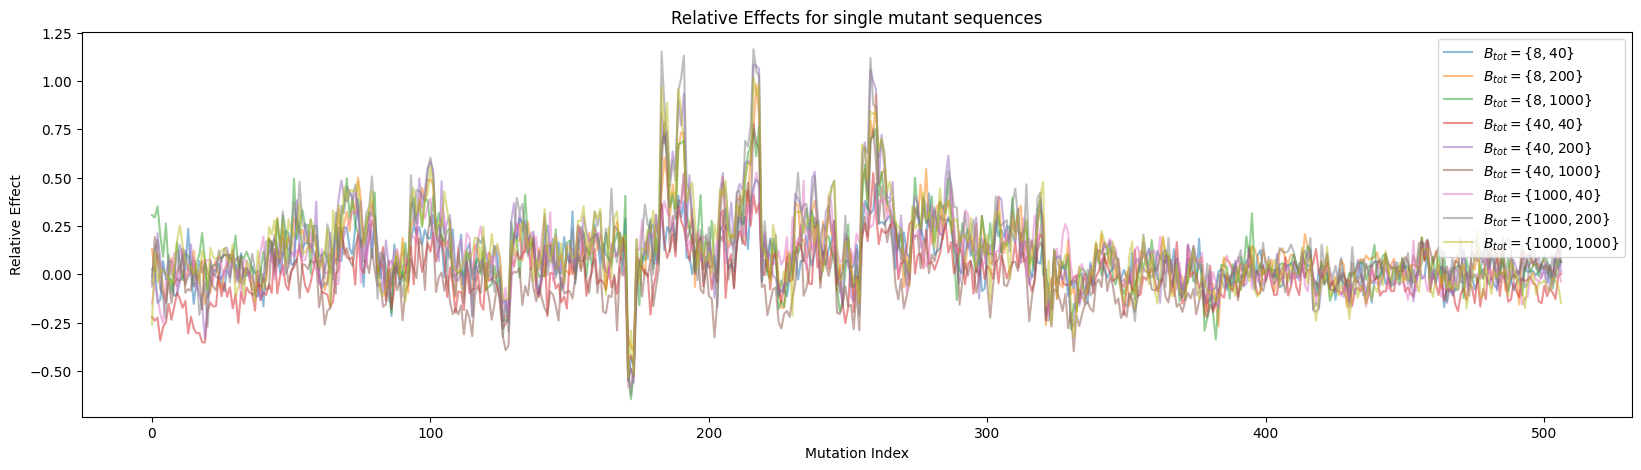

In [43]:
# plot the logK values per pool
plt.figure(figsize=(20, 5))
for i in usefull_pools:
    plt.plot(logK_single_mutant[i], label=legend_labels[i], alpha=0.5)
plt.xlabel('Mutation Index')
plt.ylabel('Relative Effect')
plt.title('Relative Effects for single mutant sequences')
plt.legend()
plt.show()

<Figure size 5000x5000 with 0 Axes>

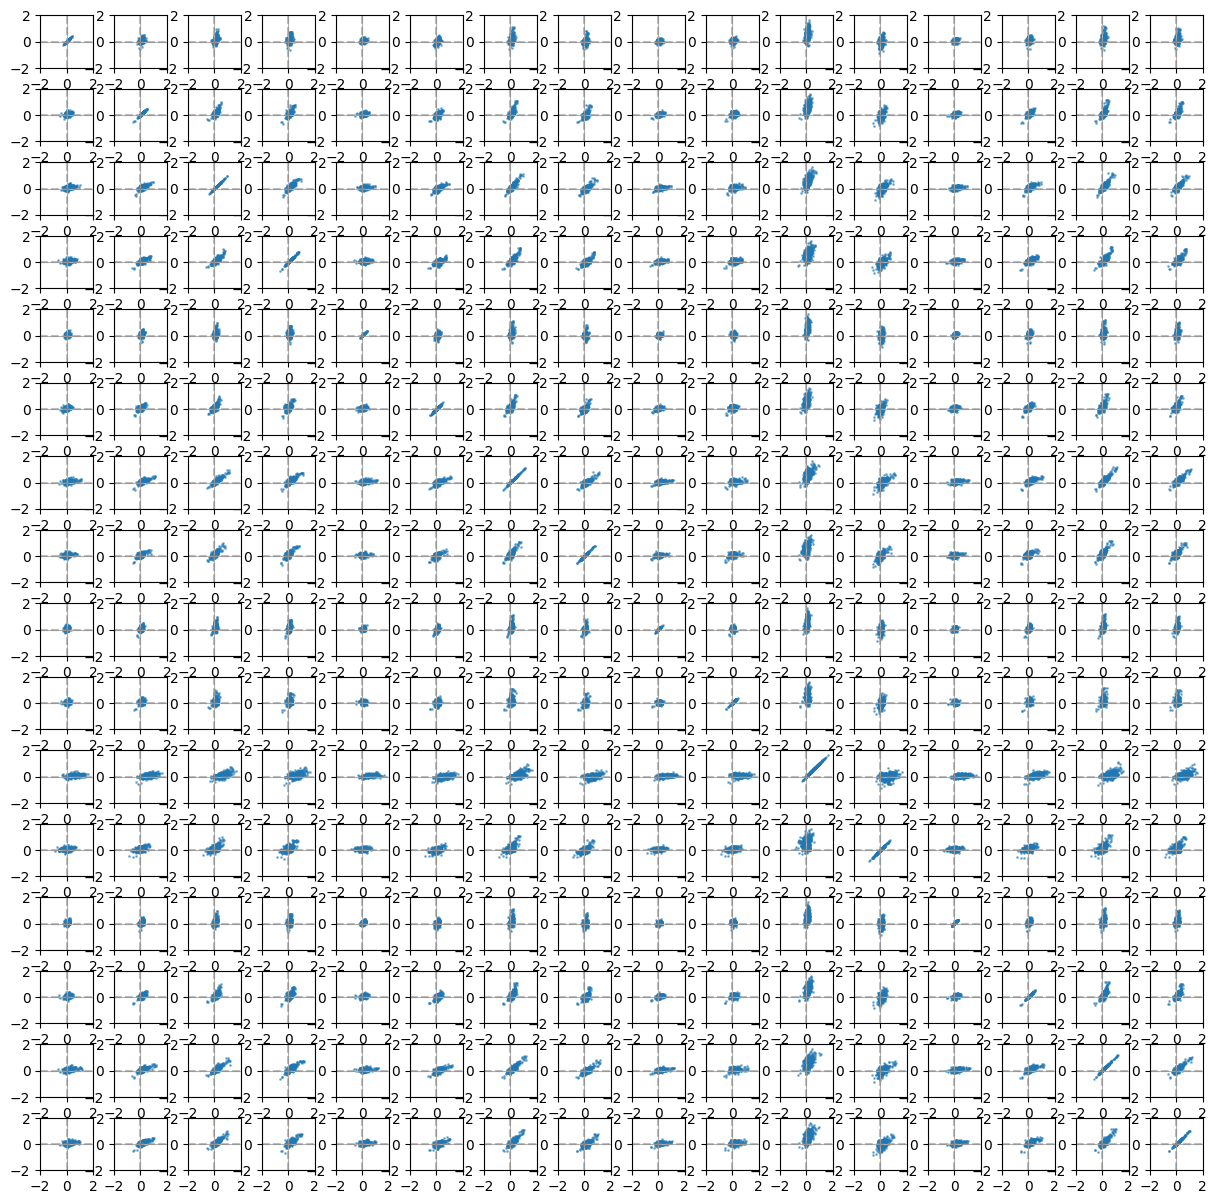

In [39]:
# do this for all pools
plt.figure(figsize=(50, 50))
# setup 16 by 16 grid
fig, axs = plt.subplots(16, 16, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# loop through all concentrations
for i in range(len(logK_single_mutant)):
    for j in range(len(logK_single_mutant)):
        # plot the logK values
        axs[i, j].scatter(logK_single_mutant[i], logK_single_mutant[j], alpha=0.5, s=1)
        # axs[i, j].set_title(f'Pool {i+1} vs Pool {j+1}')
        # axs[i, j].set_xlabel('logK pool 1')
        # axs[i, j].set_ylabel('logK pool 2')
        axs[i, j].set_xlim(-2, 2)
        axs[i, j].set_ylim(-2, 2)
        axs[i, j].axhline(0, color='gray', linestyle='--', alpha=0.5)
        axs[i, j].axvline(0, color='gray', linestyle='--', alpha=0.5)
        axs[i, j].grid()
plt.show()